# Individual Assignment 1:
## Forecasting the Demand of Purchasing during the Christmas Vacation.

![Imgur](https://i.imgur.com/r1U9dHD.png)

Problem:For individual assignment 1, please design your neural network with two hidden layers. At the same time, you can change the parameters for improving accuracy. Please explain what to do in Colab notebook one by one.

## Business Objectives : Demand Forecasting

This case study aims to identify <font color='green'>**the demand of purchasing** </font>  during the Christmas vacation. The cookie store can use the prediction result to send coupons to those customers with lower desire to purchase and thus improve the sale during the Christmas Vacation. It can also be used to foresee how many cookies are needed in the coming Christmas Vacation and therefore help the store better prepare for the busy season.

![Imgur](https://i.imgur.com/t2G4BwY.png)

**Credit:** Procurement Academy

### Business Problem and Question

Please <font color='green'>**forecast the demand of purchase of a customer in the coming Christmas Vacation given his/her previous purchase information** </font> by using Artificial Neural Networks. You can find the dataset in the data folder, and explain the solution step by step below:

In [2]:
#Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You can os then you can all your dataset as well.

In [3]:
import os
os.chdir('/content/drive/MyDrive/Deep Learning/')

Please explain everything in the detail below.

### Part1: Explore the data

In [4]:
import numpy as np
import pandas as pd

#import the data as a pandas dataframe
cookie_data = pd.read_excel("cookie_business.xlsx", sheet_name="Sheet1")

In [5]:
cookie_data.columns

Index(['Age', 'Postcode', 'Gender', 'Favourite Cookie',
       'Cookies bought frequency during Chrismas vaccations in the last 5 years'],
      dtype='object')

In [6]:
#View the head of the data
cookie_data.head()

,Age,Postcode,Gender,Favourite Cookie,Cookies bought frequency during Chrismas vaccations in the last 5 years
0,22,2010,0,1,0.08
1,30,2010,0,1,0.24
2,60,2000,1,1,0.04
3,53,2010,1,1,0.04
4,37,2000,0,1,0.08


In [7]:
cookie_data=cookie_data.drop("Postcode",axis=1)
cookie_data=cookie_data.drop("Favourite Cookie",axis=1)
cookie_data["Age"]/=100

In [8]:
#What's the demension of the data
cookie_data.shape

(46, 3)

In [9]:
#Column Description is shown below
pd.set_option('max_colwidth', 100)
pd.read_csv('Cookies Column Description.csv', sep = ';', index_col = 0)

,Description
Column Name,
Age,Customer Age
Postcode,Customer Postcode
Gender,"(0,1) 1 for Female"
Favorite Cookie,Favorite Cookie Type
Cookies Purchase Frequency,Cookies purchase frequency during Christmas vacations in the last 5 years


<font color='red'>**Plese design a neural network model yourself** </font>

### Part2: Design a neural network by yourself

In [10]:
#Split the data into training(80%) and testing(20%) sets
all_index = np.array(cookie_data.index)
train_index = np.random.choice(all_index,size=int(len(all_index)*0.8),replace=False)
test_index = np.setdiff1d(all_index,train_index)
train_data = cookie_data.loc[train_index,]
test_data = cookie_data.loc[test_index,]


In [15]:
train_data.head()

,Age,Gender,Cookies bought frequency during Chrismas vaccations in the last 5 years
17,0.21,1,0.04
42,0.16,0,0.04
11,0.17,1,0.08
35,0.19,0,0.04
16,0.33,1,0.04


## ***Q1: Please design a neural network with 2 hidden layers***
You can set the number of neurons for each layer.

In [23]:
#Design a two hidden layers of neural networks by yourself
def my_net(train_data,test_data):

#sigmoid activation function
    def sigm(x,deriv=False):
      if(deriv==True):
        y=1/(1+np.exp(-x))
        return y*(1-y)

      return 1/(1+np.exp(-x))

#relu activation function
    def relu(x,deriv=False):
      if(deriv==True):

        #return the first order derivative
        return x>0

    #return the function
      return (x>0)*x

    X = train_data.iloc[:,0:-1].values
    y = train_data.iloc[:,-1].values
    y = np.reshape(y,(train_data.shape[0],1))


    w0 = 2*np.random.random((2,6))-1
    w1 = 2*np.random.random((6,4))-1
    w2 = 2*np.random.random((4,1))-1



    print(w0)

    for j in range(100):
        a0 = X
        a1 = relu(np.dot(a0,w0))
        a2 = relu(np.dot(a1,w1))
        a3 = sigm(np.dot(a2,w2))

        a3_error = y-a3
        a3_delta=a3_error*sigm(a3,deriv=True)

        a2_error = a3_delta.dot(w2.T)
        a2_delta = a2_error*relu(a2,deriv=True)

        a1_error = a2_delta.dot(w1.T)
        a1_delta = a1_error*relu(a1,deriv=True)

        w2 += a2.T.dot(a3_delta)
        w1 += a1.T.dot(a2_delta)
        w0 += a0.T.dot(a1_delta)
        # print(w0,w1,w2)

    print("Training MSE: ",((a2-y)**2).sum()/len(a2))
    X = test_data.iloc[:,0:-1].values
    y = test_data.iloc[-1].values
    a0 = X
    a1 = relu(np.dot(a0,w0))
    a2 = relu(np.dot(a1,w1))
    a3 = relu(np.dot(a2,w2))

    a3_error = y-a3
    # print(a3)
    return (np.mean(a3_error**2))
    #return(np.mean(abs(a2_error)))

my_score = my_net(train_data,test_data)
print('Test MSE: ' + str(my_score))

[[ 0.22146439 -0.30266452 -0.35358632  0.69085771  0.19899843  0.10652408]
 [ 0.2222574   0.1443533  -0.36679124 -0.93027704 -0.07559673  0.91672261]]
Training MSE:  2.2683284479293153
Test MSE: 0.0723


## ***Q2: Please explain what is w0 (weight 0), w1, and w2 in the model. What is the dimension of weights and why is it set to this dimension?***





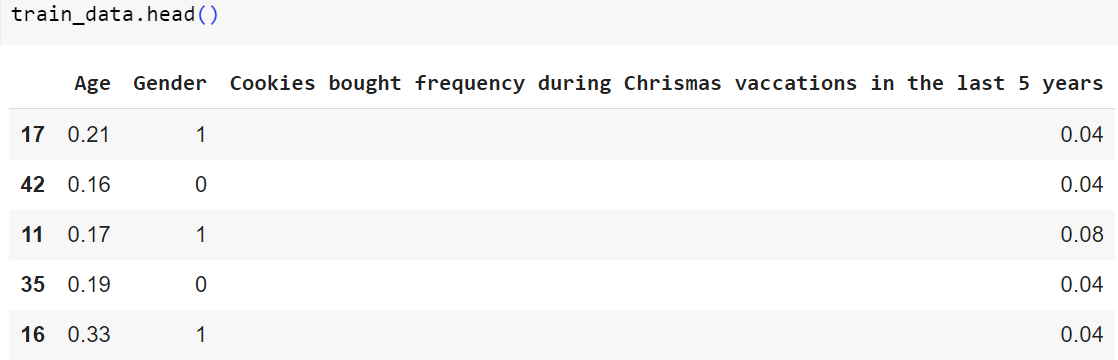



X = train_data.iloc[:,0:-1].values
y = train_data.iloc[:,-1].values

Based on the photo and code above, the dependent variables are age and gender, and the independent variable is frequency.

My setting: Input features = 2 (dependent variables), First hidden layer = 6 neurons, Second hidden layer = 4 neurons, and Output layer = 1 neuron(independent).

w0 = Input Layer -> First Hidden Layer

w1 = First Hidden Layer → Second Hidden Layer

w2 = Second Hidden Layer → Output Layer

Thus, w0: (2, 6) w1: (6, 4) w2: (4, 1)


I chose 6 neurons as it's triple to the input and 4 nerons as it's double to the input.